# Group Number : 20
Members: 



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from ipywidgets import Layout, VBox
from IPython.display import display, clear_output
import plotly.express as px

In [2]:
url = 'https://raw.githubusercontent.com/netariel/Olympic-Games-Data/main/dataset_olympics.csv'
first_olymp_df= pd.read_csv(url)
first_olymp_df.shape

(70000, 15)

Our data consists of 15 columns and 70,000 rows

In [3]:
additional_data_df = pd.read_csv('https://raw.githubusercontent.com/netariel/Olympic-Games-Data/main/noc_region.csv')
change_olp_df = pd.merge(first_olymp_df, additional_data_df[['noc_region','reg']], left_on='NOC', right_on='noc_region', how='left')
change_olp_df.shape

(70000, 17)

In [4]:
olympic_df = change_olp_df.drop(columns=['noc_region'])
olympic_df.shape

(70000, 16)

In [5]:
olympic_df

ID                            Name Sex   Age  Height  Weight  \
0          1                       A Dijiang   M  24.0   180.0    80.0   
1          2                        A Lamusi   M  23.0   170.0    60.0   
2          3             Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3          4            Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4          5        Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...      ...                             ...  ..   ...     ...     ...   
69995  35656              Stuart Fitzsimmons   M  19.0     NaN     NaN   
69996  35656              Stuart Fitzsimmons   M  19.0     NaN     NaN   
69997  35657  David Thomas "Dave" Fitzsimons   M  26.0   170.0    65.0   
69998  35657  David Thomas "Dave" Fitzsimons   M  30.0   170.0    65.0   
69999  35658                    Marek Fiurek   M  23.0   180.0    68.0   

                 Team  NOC        Games  Year  Season       City  \
0               China  CHN  1992 Summer  1992  Summer  Barcelona   
1               China  CHN  2012 Summer  2012  Summer     London   
2             Denmark  DEN  1920 Summer  1920  Summer  Antwerpen   
3      Denmark/Sweden  DEN  1900 Summer  1900  Summer      Paris   
4         Netherlands  NED  1988 Winter  1988  Winter    Calgary   
...               ...  ...          ...   ...     ...        ...   
69995   Great Britain  GBR  1976 Winter  1976  Winter  Innsbruck   
69996   Great Britain  GBR  1976 Winter  1976  Winter  Innsbruck   
69997       Australia  AUS  1976 Summer  1976  Summer   Montreal   
69998       Australia  AUS  1980 Summer  1980  Summer     Moskva   
69999  Czech Republic  CZE  1998 Winter  1998  Winter     Nagano   

                 Sport                             Event Medal             reg  
0           Basketball       Basketball Men's Basketball   NaN           China  
1                 Judo      Judo Men's Extra-Lightweight   NaN           China  
2             Football           Football Men's Football   NaN         Denmark  
3           Tug-Of-War       Tug-Of-War Men's Tug-Of-War  Gold         Denmark  
4        Speed Skating  Speed Skating Women's 500 metres   NaN     Netherlands  
...                ...                               ...   ...             ...  
69995    Alpine Skiing  Alpine Skiing Men's Giant Slalom   NaN              UK  
69996    Alpine Skiing        Alpine Skiing Men's Slalom   NaN              UK  
69997        Athletics     Athletics Men's 10,000 metres   NaN       Australia  
69998        Athletics      Athletics Men's 5,000 metres   NaN       Australia  
69999  Nordic Combined        Nordic Combined Men's Team   NaN  Czech Republic  

[70000 rows x 16 columns]

In [6]:
olympic_df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
reg        object
dtype: object

בשביל לדעת איך לעבוד עם הנתונים רצינו לדעת את סוג האובייקט בכל עמודה

In [7]:
num_of_team = len(olympic_df['Team'].unique())
num_of_NOC = len(olympic_df['NOC'].unique())
print(f"num of Team:{num_of_team}\nnum of NOC:{num_of_NOC}")

num of Team:827
num of NOC:226


ראינו שיש אי התאמה בין מספר המדינות לבין מספר סמלי המדינה.
בדקנו את שמות המדינות וראינו שיש מדינות שקרויות פעמים עם שינוי בתו, אך מדובר על אותה מדינה ולכן החלטנו שבמידה ונרצה להתייחס לנתון המדינה/קבוצה נשתמש בעמודת הסמל

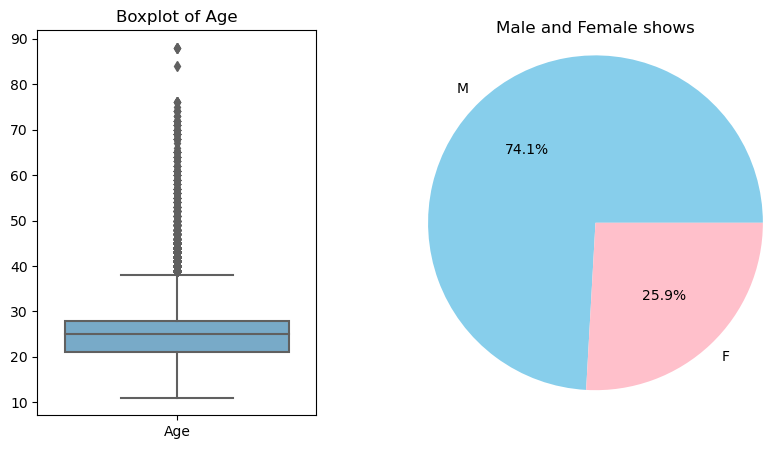

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(9, 5))
sns.boxplot(data=olympic_df[['Age']], ax=ax[0],palette='Blues')
ax[0].set_title('Boxplot of Age')
sns.set_palette("pastel")
sex_counts = olympic_df['Sex'].value_counts()
ax[1].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['skyblue', 'pink'], radius=1.5)
ax[1].set_title('Male and Female shows', y=1.15)
plt.subplots_adjust(wspace=0.5)
plt.show()

In [9]:
missing_values_age = olympic_df['Age'].isnull().sum()
missing_values_age

2732

In [10]:
female_df = olympic_df[olympic_df['Sex'] == 'F'].copy()
female_df['Medal'] = female_df['Medal'].fillna(0)

In [11]:
age_medals_female = female_df.groupby(['Age', 'Medal'])['Name'].count().unstack()
age_medals_female=age_medals_female.reset_index()

In [12]:
# missing_values_age_female = female_df['Age'].isnull().sum()
# missing_values_age_female

In [13]:
male_df = olympic_df[olympic_df['Sex'] == 'M'].copy()
male_df['Medal'] = male_df['Medal'].fillna(0)
# היה לי נוח להכניס 0 בשביל הגרפים שאני אציג מאוחר יותר

In [14]:
age_medals_male = male_df.groupby(['Age', 'Medal'])['Name'].count().unstack()
age_medals_male = age_medals_male.reset_index()

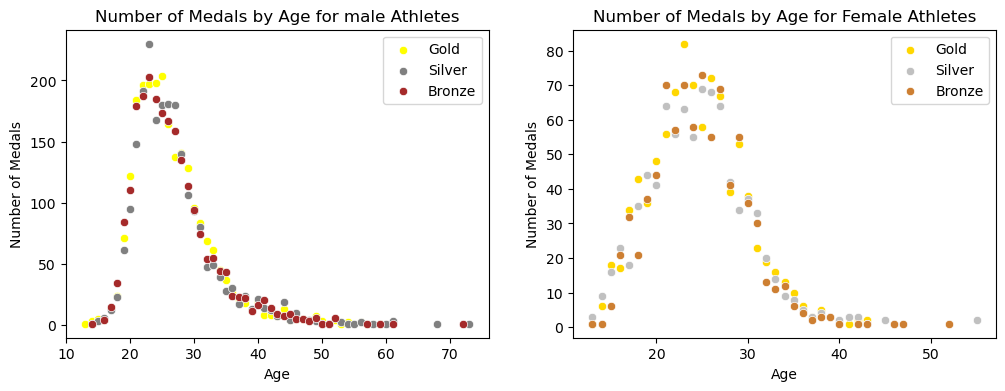

<Figure size 500x300 with 0 Axes>

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plt.figure(figsize=(5, 3))
sns.scatterplot(data=age_medals_male, x='Age', y='Gold', label='Gold', color='yellow', ax = ax[0])
sns.scatterplot(data=age_medals_male, x='Age', y='Silver', label='Silver', color='grey', ax = ax[0])
sns.scatterplot(data=age_medals_male, x='Age', y='Bronze', label='Bronze', color='brown', ax = ax[0])
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Number of Medals')
ax[0].set_title('Number of Medals by Age for male Athletes')
ax[0].legend()


sns.scatterplot(data=age_medals_female, x='Age', y='Gold', label='Gold', color='gold', ax = ax[1])
sns.scatterplot(data=age_medals_female, x='Age', y='Silver', label='Silver', color='silver', ax = ax[1])
sns.scatterplot(data=age_medals_female, x='Age', y='Bronze', label='Bronze', color='#cd7f32', ax = ax[1])
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Number of Medals')
ax[1].set_title('Number of Medals by Age for Female Athletes')
ax[1].legend()
plt.tight_layout()
plt.show()

רצינו לבדוק את ההתפלגות של הזכיה במדליות והסוג שלהן לפי הגיל אצל גברים ונשים בנפרד

ניתן להסיק ממהתפלגות כמה דברים
קודם כל כמות המדליות שזכו בה גברים יותר גדולה מהכמות שזכו בה הנשים, למעשה זה לא כל כך מפתיע כי ראינו כבר שבאופן יחסי יש הרבה יותר גברים שמשתתפים באולימפיאדה
דבר מעניין אחר שניתן לראות מהגרף הוא שאמנם זה לא מספר זכיות גדול אבל יש גברים שזוכים במדליות בגילאים יותר מאוחרים מאשר נשים. ההתפלגות אצל הגברים רחבה יותר מאשר אצל הנשים
הגרפים האלו העלו אצלנו שאלות כמו:
באיזה ספורט יש משתתפים שזוכים במדליות בגילאים שהיינו מצפות שכבר לא יתחרו באולימפיאדה
האם יש סוגי ספורט שיש יתרון להיות מבוגרים או צעירים יותר ואם כן האם יש משמעות למקצה

In [16]:
# age_medals_male = age_medals_male.merge(male_df[['Age','Sport']], on='Age', how='left').drop_duplicates()
# age_medals_male.haed()
# age_medals_male

In [17]:
# ספירת הופעות של כל ערך בעמודה 'Age'
age_counts_male = male_df['Age'].value_counts()
most_common_age_male = age_counts_male.idxmax()
most_common_age_count_male = age_counts_male.max()

# הדפסת הנתונים
print("Most common age (male):", most_common_age_male, "Count:", most_common_age_count_male)

age_counts_female = female_df['Age'].value_counts()
most_common_age_female = age_counts_female.idxmax()
most_common_age_count_female = age_counts_female.max()


# הדפסת הנתונים
print("Most common age (Female):", most_common_age_female, "Count:", most_common_age_count_female)


Most common age (male): 23.0 Count: 4271
Most common age (Female): 21.0 Count: 1402


בדיקה של הגיל השכיח ביותר אצל גברים ונשים. גם בבדיקה זו כמו בהתפלגות (שהיא התפלגות קטנה יותר אצל הנשים) ניתן לראות שהגיל השכיח ביותר אצל הנשים קטן מהגיל השכיח ביותר אצל הגברים

In [18]:
sport_order = sorted(olympic_df['Sport'].unique())

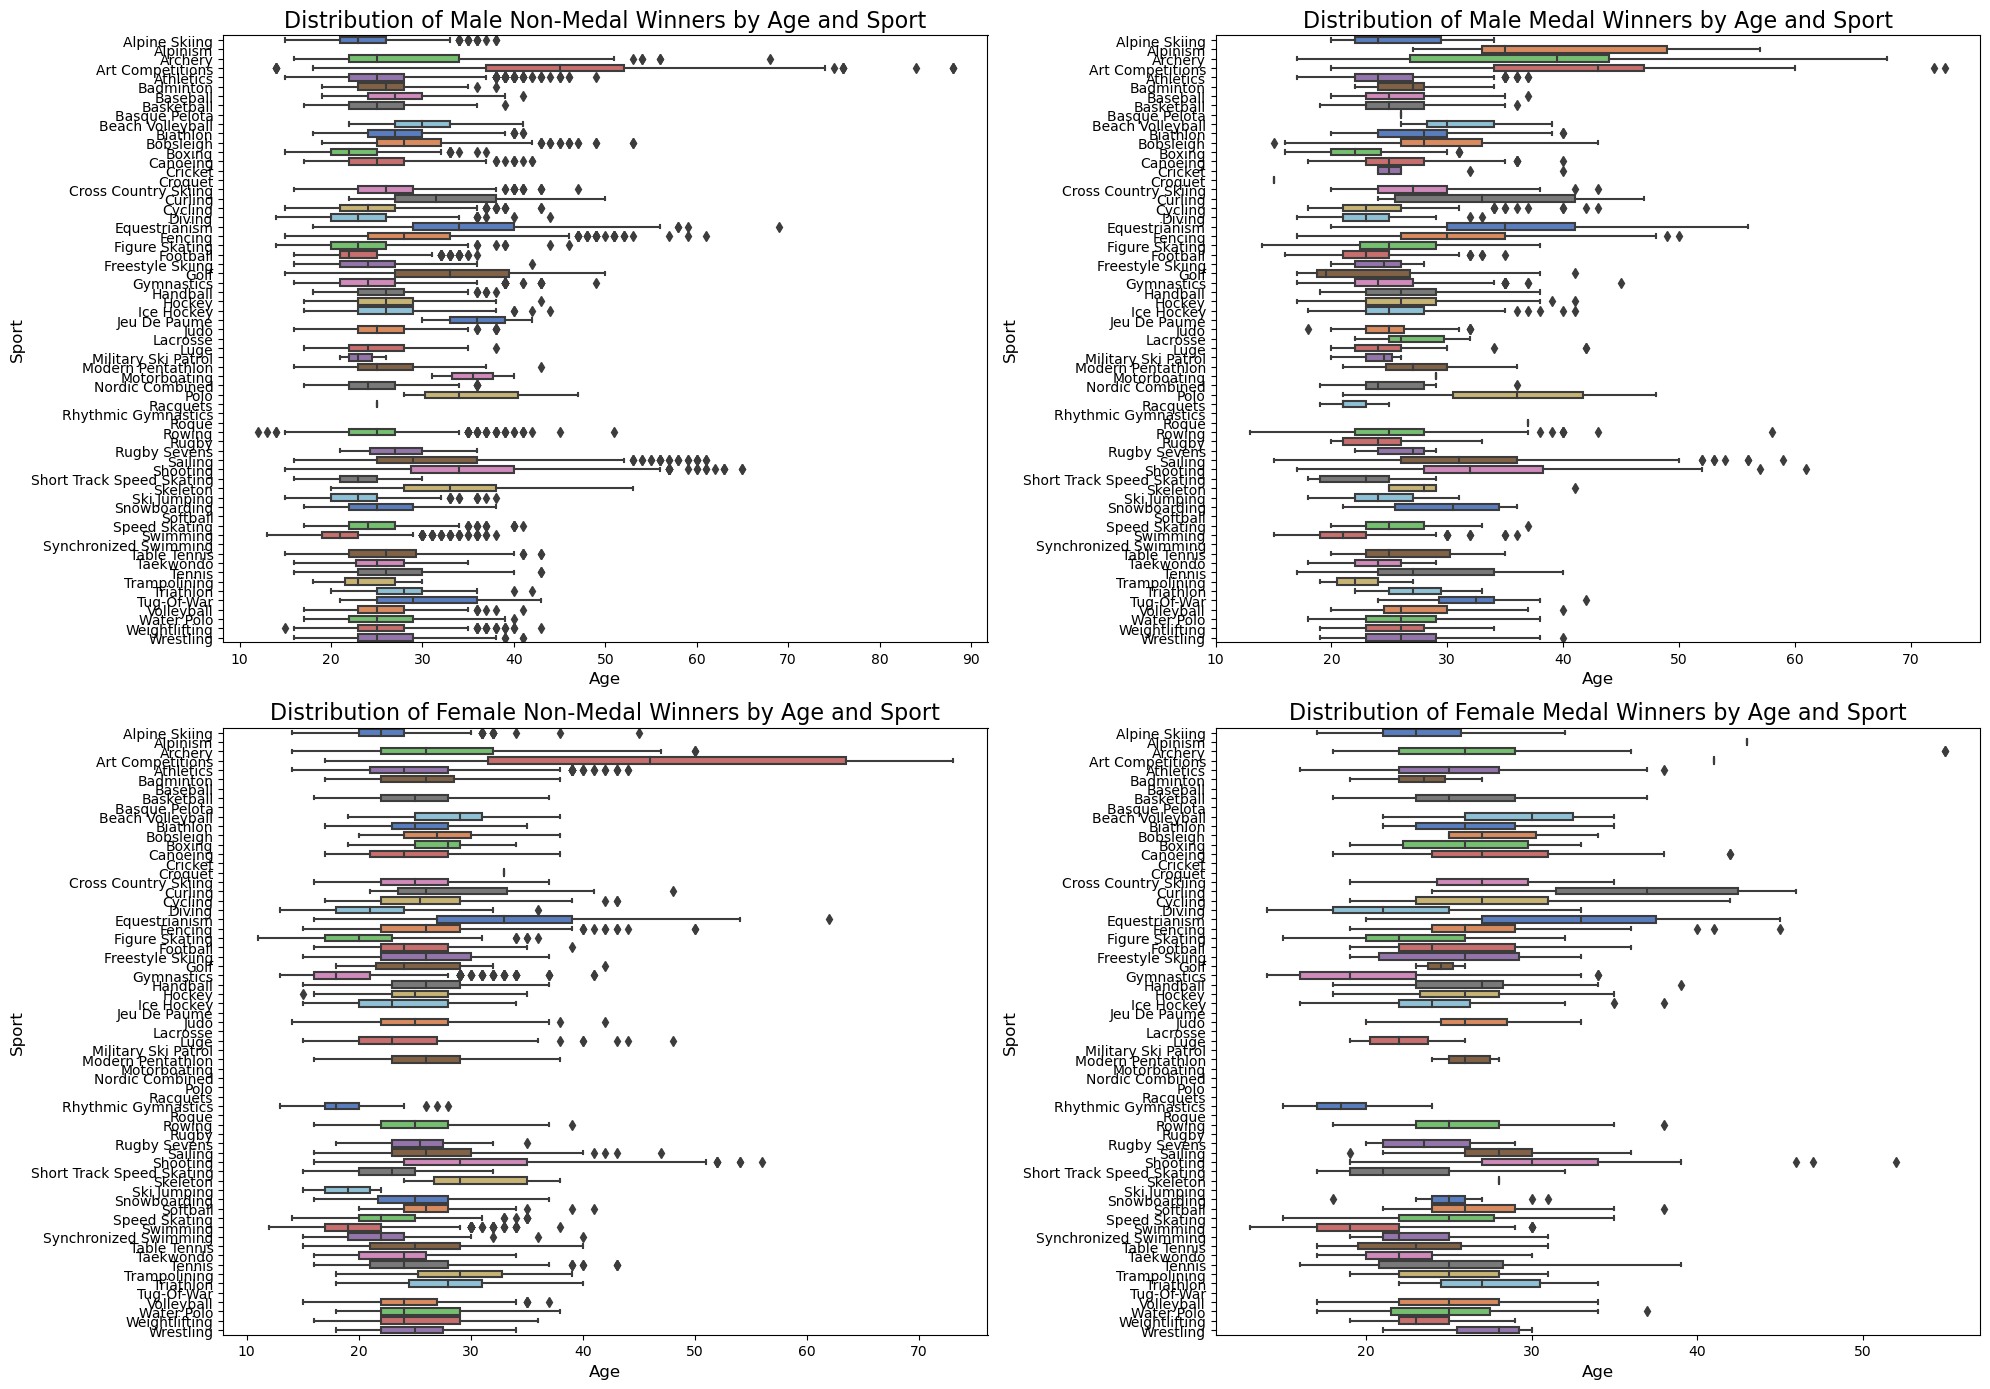

In [19]:
# יצירת תצוגה עם 2 טבלאות, אחת לגברים ואחת לנשים
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))

# בוקספלוט עבור הגברים ללא מדליות
sns.boxplot(data=male_df[male_df['Medal'] == 0], x='Age', y='Sport', order=sport_order, palette='muted', ax=axes[0, 0], width=0.7)
axes[0, 0].set_title('Distribution of Male Non-Medal Winners by Age and Sport', fontsize=16)
axes[0, 0].set_xlabel('Age', fontsize=12)
axes[0, 0].set_ylabel('Sport', fontsize=12)

# בוקספלוט עבור הגברים עם מדליות
sns.boxplot(data=male_df[male_df['Medal'] != 0], x='Age', y='Sport', order=sport_order, palette='muted', ax=axes[0, 1], width=0.7)
axes[0, 1].set_title('Distribution of Male Medal Winners by Age and Sport', fontsize=16)
axes[0, 1].set_xlabel('Age', fontsize=12)
axes[0, 1].set_ylabel('Sport', fontsize=12)

# בוקספלוט עבור הנשים ללא מדליות
sns.boxplot(data=female_df[female_df['Medal'] == 0], x='Age', y='Sport', order=sport_order, palette='muted', ax=axes[1, 0], width=0.7)
axes[1, 0].set_title('Distribution of Female Non-Medal Winners by Age and Sport', fontsize=16)
axes[1, 0].set_xlabel('Age', fontsize=12)
axes[1, 0].set_ylabel('Sport', fontsize=12)

# בוקספלוט עבור הנשים עם מדליות
sns.boxplot(data=female_df[female_df['Medal'] != 0], x='Age', y='Sport', order=sport_order, palette='muted', ax=axes[1, 1], width=0.7)
axes[1, 1].set_title('Distribution of Female Medal Winners by Age and Sport', fontsize=16)
axes[1, 1].set_xlabel('Age', fontsize=12)
axes[1, 1].set_ylabel('Sport', fontsize=12)

plt.tight_layout()
plt.show()


הראנו התפלגות של גילאים לפי קטגוריית הספורט בעזרת בוקספלוט עבור גברים שזכו במדליהת גברים שלא זכו במדליה וכך גם על נשים.
קודם כל ניתן לשים לב שישנם כמה קטגורייות ספורט שבהן התחרו רק גברים ולא נשים.
דבר נוסף, ניתן לראות שיש חריגי גיל ממה שהיינו מצפים שיהיה באולימפיאדה- יש משתתפים בגילאי 80 ו- 90 בקטגוריית ספורט - אומנות, נרחיב 
עוד דבר שניתן לראות בראיה כללית ניתן לראות שיש הבדלים בין התלפגות הזוכים בכל ספורט, כלומר, יכול להיות שיש סוגי ספורט שהגיל משפיע על הביצוע
בשביל להראות את ההבדלים בין כל סוג ספורט בפני עצמו עבור גברים ונשים נציג את הגרף הבא
מעבר לכך, ניתן לראות שיש קטגורייה יחסית יוצאת דופן- חץ וקשת אצל הגברים שבה התפלגות מחזיקי המדליות דיי רחבה אבל ביחס להתפלגות של מי שלא מחזיק במדליה בקטגורייה נראה שהתפלגות הזוכים היא בגילאים גדולים יותר.
אז אמנם רוב הקטגוריות מתנהגות כמו האינסטינקט הראשוני שלנו ,לחשוב שרוב הזכיות יהיו אצל הצעירים אבל לא צעירים מדי, אבל יש קטגוריות שזוהי מחשבה לא נכונה ולכן הראנו התפלגויות עבור כל ספורט לגברים ונשים


**לתקן, יש ספורט שהשתתפו בו רק נשים

In [20]:
# plt.figure(figsize=(14, 10))
# sns.scatterplot(data=male_df[male_df['Medal'] != 0], x='Age', y='Sport', hue='Medal', style='Medal', s=100, palette='muted')
# plt.title('Medals by Age, Sport and Type')
# plt.xlabel('Age')
# plt.ylabel('Sport')
# plt.legend(title='Medal Type')
# plt.show()

In [21]:
# plt.figure(figsize=(14, 10))
# sns.scatterplot(data=male_df[male_df['Medal'] == 0], x='Age', y='Sport', hue='Medal', style='Medal', s=100, palette='muted')
# plt.title('Medals by Age, Sport and Type')
# plt.xlabel('Age')
# plt.ylabel('Sport')
# plt.legend(title='Medal Type')
# plt.show()

In [22]:
# יצירת תיבת תצוגה
output = widgets.Output()

# יצירת פונקציה לבניית הגרף
def build_graph(sport):
    data_male_medal = male_df[(male_df['Sport'] == sport) & (male_df['Medal'] != 0)]['Age']
    data_male_no_medal = male_df[(male_df['Sport'] == sport) & (male_df['Medal'] == 0)]['Age']
    data_female_medal = female_df[(female_df['Sport'] == sport) & (female_df['Medal'] != 0)]['Age']
    data_female_no_medal = female_df[(female_df['Sport'] == sport) & (female_df['Medal'] == 0)]['Age']
    
    fig = make_subplots(rows=2, cols=2, subplot_titles=("Male Medal Winners", "Male Non-Medal Winners", "Female Medal Winners", "Female Non-Medal Winners"))
    
    fig.add_trace(go.Box(y=data_male_medal, name="Male Medal Winners"), row=1, col=1)
    fig.add_trace(go.Box(y=data_male_no_medal, name="Male Non-Medal Winners"), row=1, col=2)
    fig.add_trace(go.Box(y=data_female_medal, name="Female Medal Winners"), row=2, col=1)
    fig.add_trace(go.Box(y=data_female_no_medal, name="Female Non-Medal Winners"), row=2, col=2)
    
    fig.update_layout(title_text=f"Distribution of Age for {sport} Players", showlegend=False, height=700, width=900)
    
    with output:
        clear_output(wait=True)
        fig.show()

# יצירת Dropdown לבחירת הספורט
sport_dropdown = widgets.Dropdown(options=sorted(olympic_df['Sport'].unique()), description='Sport:', layout=Layout(width='300px'))
sport_dropdown.observe(lambda change: build_graph(change['new']), names='value')

# הצגת ה-Dropdown והגרף הראשון
display(VBox([sport_dropdown, output]))
build_graph(male_df['Sport'].unique()[0])


למעשה, הגרפים האלו הם פירוט רחב יותר של הבוקספלוטים שראינו קודם. פה נוכל להסתכל על התפלגות הגילאים של גברים ונשים גם בעלי מדליות וגם לא
נוכל להסתכל בפירוט עבור כל סוג ספורט ולראות את ההבדלים
בגלל הכמות הגדולה מאוד של קטגוריות הספורט בחרנו להראות זאת בצורה יותר נגישה ועם אפשרות בחירה


בחרנו להמשיך ולפרט על ההתפלגות של הזכיה לפי הגיל אבל הפעם ממש לפי המקצה בתוך הספורט, כך אם אני יודעת שאני רוצה להתחרות בקטגוריה מסויימת אוכל לנסות לכוון למקצה שבו יש לי יותר אופציות לזכות
בגלל ההבנה שיש פערים בין התוצאות של גברים ונשים החלטנו לפצל את הגרפים כדי שכל מין יוכל להתמקד במקצים שלו

**פיצול לפי מקצים לגברים**

In [23]:
# יצירת תיבת תצוגה
output = widgets.Output()

# פונקציה לבניית הגרף
def build_graph(sport, event):
    data_medal = male_df[(male_df['Sport'] == sport) & (male_df['Event'] == event) & (male_df['Medal'] != 0)]['Age']
    data_no_medal = male_df[(male_df['Sport'] == sport) & (male_df['Event'] == event) & (male_df['Medal'] == 0)]['Age']
    
    if data_medal.empty and data_no_medal.empty:
        with output:
            clear_output(wait=True)
            print(f"No data available for {event} in {sport}")
        return
    
    fig = make_subplots(rows=1, cols=1)
    fig.add_trace(go.Box(y=data_medal, name=f'{event} - Medal Winners'), row=1, col=1)
    fig.add_trace(go.Box(y=data_no_medal, name=f'{event} - Non-Medal Winners'), row=1, col=1)
    fig.update_layout(title_text=f"Distribution of Age for {event} Players in {sport}", xaxis_title="Medal Status", yaxis_title="Age")
    
    with output:
        clear_output(wait=True)
        fig.show()

# יצירת Dropdown לבחירת הספורט והאירוע
sport_dropdown = widgets.Dropdown(options=sorted(male_df['Sport'].unique()), description='Sport:')
event_dropdown = widgets.Dropdown(description='Event:')

# פונקציה לעדכון האירועים עבור ספורט נבחר
def update_events_options(change):
    selected_sport = change['new']
    events = sorted(male_df[male_df['Sport'] == selected_sport]['Event'].unique())
    event_dropdown.options = events

sport_dropdown.observe(update_events_options, names='value')

# פונקציה לעדכון הגרף עבור הספורט והאירוע הנבחרים
def update_graph(change):
    sport = sport_dropdown.value
    event = event_dropdown.value
    build_graph(sport, event)

event_dropdown.observe(update_graph, names='value')

# הצגת ה-Dropdowns והגרף
display(VBox([sport_dropdown, event_dropdown]), output)

# תחילת התצוגה עבור הספורט הראשון והאירוע הראשון ברשימה
build_graph(male_df['Sport'].unique()[0], male_df['Event'].unique()[0])
 

Output()

**פיצול לפי מקצים לנשים**

In [24]:

# יצירת תיבת תצוגה
output = widgets.Output()

# פונקציה לבניית הגרף
def build_graph(sport, event):
    data_medal_female = female_df[(female_df['Sport'] == sport) & (female_df['Event'] == event) & (female_df['Medal'] != 0)]['Age']
    data_no_medal_female = female_df[(female_df['Sport'] == sport) & (female_df['Event'] == event) & (female_df['Medal'] == 0)]['Age']
    
    if data_medal_female.empty and data_no_medal_female.empty:
        with output:
            clear_output(wait=True)
            print(f"No data available for {event} in {sport}")
        return
    
    fig = make_subplots(rows=1, cols=1)
    if not data_medal_female.empty:
        fig.add_trace(go.Box(y=data_medal_female, name=f'{event} - Female Medal Winners'), row=1, col=1)
    if not data_no_medal_female.empty:
        fig.add_trace(go.Box(y=data_no_medal_female, name=f'{event} - Female Non-Medal Winners'), row=1, col=1)
        
    fig.update_layout(title_text=f"Distribution of Age for {event} Players in {sport}", xaxis_title="Medal Status", yaxis_title="Age")
    
    with output:
        clear_output(wait=True)
        fig.show()

# יצירת Dropdowns לבחירת הספורט והאירוע
sport_dropdown = widgets.Dropdown(options=sorted(female_df['Sport'].unique()), description='Sport:')
event_dropdown = widgets.Dropdown(description='Event:')

# פונקציה לעדכון האירועים עבור ספורט נבחר
def update_events_options(change):
    selected_sport = change['new']
    events = sorted(female_df[female_df['Sport'] == selected_sport]['Event'].unique())
    event_dropdown.options = events

sport_dropdown.observe(update_events_options, names='value')

# פונקציה לעדכון הגרף עבור הספורט והאירוע הנבחרים
def update_graph(change):
    sport = sport_dropdown.value
    event = event_dropdown.value
    build_graph(sport, event)

event_dropdown.observe(update_graph, names='value')

# הצגת ה-Dropdowns והגרף
display(VBox([sport_dropdown, event_dropdown]), output)

# תחילת התצוגה עבור הספורט הראשון והאירוע הראשון ברשימה
build_graph(female_df['Sport'].unique()[0], female_df['Event'].unique()[0])


Output()

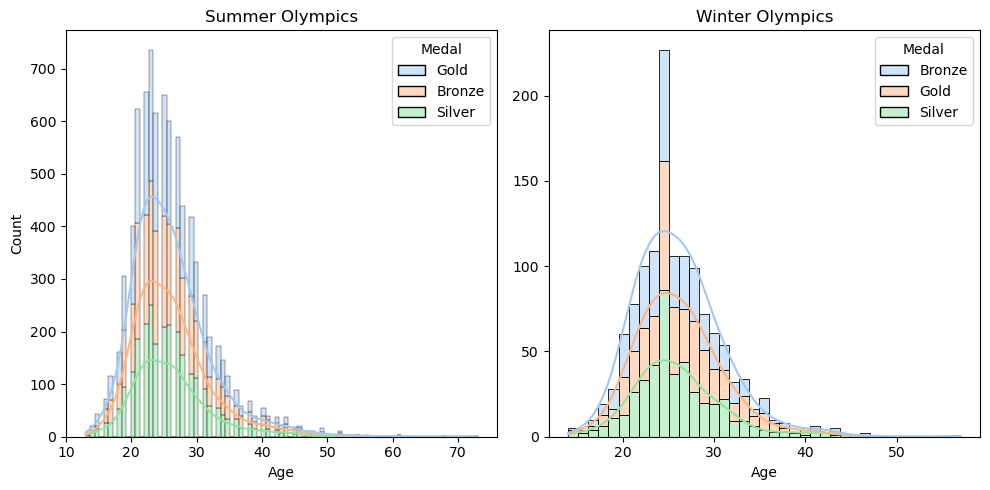

In [25]:
fig = plt.figure(figsize=(10, 5))
grid = gridspec.GridSpec(1, 2)

ax1 = plt.subplot(grid[0])
sns.histplot(data=olympic_df[olympic_df['Season'] == 'Summer'], x='Age', hue='Medal', kde=True, multiple="stack", ax=ax1)
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')
ax1.set_title('Summer Olympics')

ax2 = plt.subplot(grid[1])
sns.histplot(data=olympic_df[olympic_df['Season'] == 'Winter'], x='Age', hue='Medal', kde=True, multiple="stack", ax=ax2)
ax2.set_xlabel('Age')
ax2.set_ylabel('')
ax2.set_title('Winter Olympics')

plt.tight_layout()
plt.show()

עניין אותנו לבדוק האם יש התפלגות שונה בזוכים במדליות באולימפיאדת חורף וקיץ ואכן גילינו שבאולימפיאדת קיץ יש קטגוריות שמצנחים בהן גם משתתפים מבוגרים יותר
אמנם באולמפיאדת קיץ ישנם גם מנצחים מבוגרים יותר אבל ניתן לראות שגם באולימפיאדת חורף וגם בקיץ רוב הזכיות הן סביב אותם הגילאים ואלו לא גילאים מבוגרים בדכ.. 

עכשיו, רצינו לבדוק באיזה ספורט בצורה ספציפית יותר השתתפו אנשים מעל גיל פנסיה
אצל נשים- 65
גברים - 67

In [26]:
women_over_65 = olympic_df[(olympic_df['Sex'] == 'F') & (olympic_df['Age'] > 65)]
men_over_67 = olympic_df[(olympic_df['Sex'] == 'M') & (olympic_df['Age'] > 67)]
women_over_65_unique = women_over_65.drop_duplicates(subset=['Name'])
men_over_67_unique = men_over_67.drop_duplicates(subset=['Name'])
print("Number of unique women participants over 65:", len(women_over_65_unique))
print("Number of unique men participants over 67:", len(men_over_67_unique))

Number of unique women participants over 65: 3
Number of unique men participants over 67: 18


**גברים מתחרים מעבר גיל הפרישה**

In [27]:
men_over_67_unique_sports = men_over_67.groupby('Name')['Sport'].nunique().reset_index()
men_over_67_unique_sports

Name  Sport
0                                        Albin Dbrich      1
1                                 Frank Weston Benson      1
2                                George Alfred Elcock      1
3                               George Denholm Armour      1
4                                     Gino De Finetti      1
5                                  Godefroid Devreese      1
6       John (Herbert Crawford-) Copley (Williamson-)      1
7                                          Jozu Dupon      1
8                  Lionel Dalhousie Robertson Edwards      1
9                               Louis Bernard Bonnier      1
10  Louis Jules Henri du Le Vaillant du Douet de G...      1
11                                     Michael Drobil      1
12                                       Olof Ahlberg      1
13                                Pedro Figari Solari      1
14                                 Robert Day Andrews      1
15                              Samuel Harding Duvall      1
16                            Thomas Cantrell Dugdale      1
17                         Thomas Cowperthwait Eakins      1

ניתן לראות שכל משתתף מעל גיל 67 משתתף בקטגורית ספורט אחת 

In [28]:
men_over_67_unique = men_over_67.drop_duplicates(subset=['Name', 'Year', 'Age', 'Medal', 'Sport'])
men_over_67_unique

ID                                               Name Sex   Age  \
2392    1337                                       Olof Ahlberg   M  71.0   
7433    4160                                 Robert Day Andrews   M  75.0   
9369    5146                              George Denholm Armour   M  68.0   
9371    5146                              George Denholm Armour   M  84.0   
19297  10220                                Frank Weston Benson   M  70.0   
19308  10220                                Frank Weston Benson   M  74.0   
25367  13269                              Louis Bernard Bonnier   M  71.0   
44584  22984      John (Herbert Crawford-) Copley (Williamson-)   M  73.0   
44585  22984      John (Herbert Crawford-) Copley (Williamson-)   M  73.0   
50729  26091                                    Gino De Finetti   M  71.0   
54531  27972                                 Godefroid Devreese   M  74.0   
56599  28993                                       Albin Dbrich   M  76.0   
58744  30055                                     Michael Drobil   M  70.0   
58985  30189  Louis Jules Henri du Le Vaillant du Douet de G...   M  69.0   
59495  30472                            Thomas Cantrell Dugdale   M  68.0   
60009  30731                                         Jozu Dupon   M  72.0   
60010  30731                                         Jozu Dupon   M  72.0   
60402  30932                              Samuel Harding Duvall   M  68.0   
60403  30932                              Samuel Harding Duvall   M  68.0   
60861  31173                         Thomas Cowperthwait Eakins   M  88.0   
61489  31492                 Lionel Dalhousie Robertson Edwards   M  69.0   
62839  32215                               George Alfred Elcock   M  76.0   
69049  35215                                Pedro Figari Solari   M  71.0   

       Height  Weight                Team  NOC        Games  Year  Season  \
2392      NaN     NaN              Sweden  SWE  1948 Summer  1948  Summer   
7433      NaN     NaN       United States  USA  1932 Summer  1932  Summer   
9369      NaN     NaN       Great Britain  GBR  1932 Summer  1932  Summer   
9371      NaN     NaN       Great Britain  GBR  1948 Summer  1948  Summer   
19297     NaN     NaN       United States  USA  1932 Summer  1932  Summer   
19308     NaN     NaN       United States  USA  1936 Summer  1936  Summer   
25367     NaN     NaN              France  FRA  1928 Summer  1928  Summer   
44584     NaN     NaN       Great Britain  GBR  1948 Summer  1948  Summer   
44585     NaN     NaN       Great Britain  GBR  1948 Summer  1948  Summer   
50729     NaN     NaN               Italy  ITA  1948 Summer  1948  Summer   
54531     NaN     NaN             Belgium  BEL  1936 Summer  1936  Summer   
56599     NaN     NaN             Austria  AUT  1948 Summer  1948  Summer   
58744     NaN     NaN             Austria  AUT  1948 Summer  1948  Summer   
58985     NaN     NaN            France-1  FRA  1900 Summer  1900  Summer   
59495     NaN     NaN       Great Britain  GBR  1948 Summer  1948  Summer   
60009     NaN     NaN             Belgium  BEL  1936 Summer  1936  Summer   
60010     NaN     NaN             Belgium  BEL  1936 Summer  1936  Summer   
60402     NaN     NaN       United States  USA  1904 Summer  1904  Summer   
60403     NaN     NaN  Cincinnati Archers  USA  1904 Summer  1904  Summer   
60861     NaN     NaN       United States  USA  1932 Summer  1932  Summer   
61489     NaN     NaN       Great Britain  GBR  1948 Summer  1948  Summer   
62839     NaN     NaN       Great Britain  GBR  1932 Summer  1932  Summer   
69049     NaN     NaN             Uruguay  URU  1932 Summer  1932  Summer   

              City             Sport  \
2392        London  Art Competitions   
7433   Los Angeles  Art Competitions   
9369   Los Angeles  Art Competitions   
9371        London  Art Competitions   
19297  Los Angeles  Art Competitions   
19308       Berlin  Art Competitions   
25367    Amsterdam  Art Competit

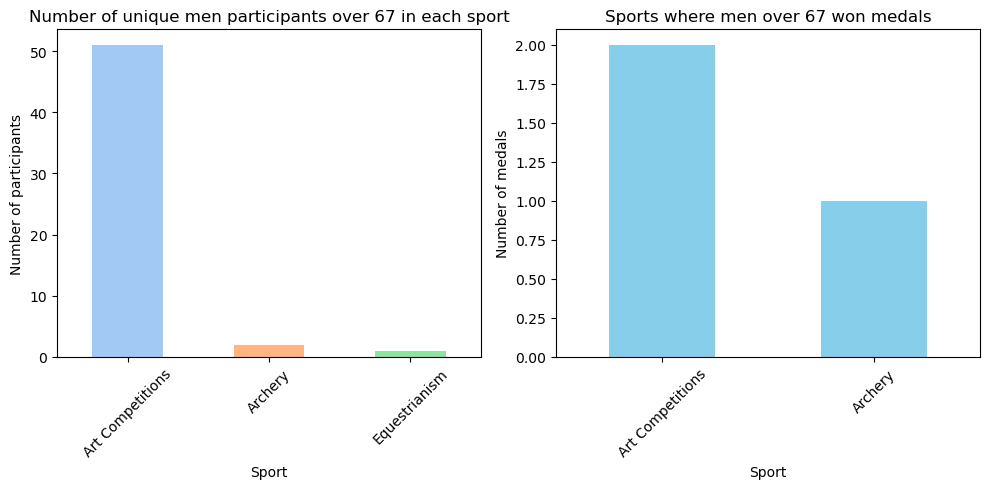

In [36]:
men_over_67_with_medal = men_over_67[men_over_67['Medal'].notnull()]
sport_counts_medals = men_over_67_with_medal['Sport'].value_counts()

men_over_67_all = men_over_67['Sport'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
colors = sns.color_palette('pastel')
men_over_67_all.plot(kind='bar', ax=axes[0], color=colors)
axes[0].set_title('Number of unique men participants over 67 in each sport')
axes[0].set_xlabel('Sport')
axes[0].set_ylabel('Number of participants' )
axes[0].tick_params(axis='x', rotation=45)

sport_counts_medals.plot(kind='bar', ax=axes[1], color='skyblue')
axes[1].set_title('Sports where men over 67 won medals')
axes[1].set_xlabel('Sport')
axes[1].set_ylabel('Number of medals')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


קודם כל ניתן לראות שהספורט בו משתתפים הכי הרבה משתתפים אשר עברו את גיל הפרישה זה בתחרות אומנות

מבחינת ניצחונות במדליות מעבר לגיל הפרישה ניתן לראות שיש זכיות גם בתחרות אומנות וגם בחץ וקשת

In [37]:
men_over_67_year = men_over_67.drop_duplicates(subset=['Games'])
men_over_67_year[['Games', 'Sport']]

Games             Sport
2392   1948 Summer  Art Competitions
7433   1932 Summer  Art Competitions
19308  1936 Summer  Art Competitions
25367  1928 Summer  Art Competitions
58985  1900 Summer     Equestrianism
60402  1904 Summer           Archery

שמנו לב שהמשתתפים מעל גיל הפרישה השתתפו בטווח של השנים 1900-1948 דבר זה מפתיע במיוחד שדווקא בשנים אלו השתתפו כל המשתתתפים שמעל גיל הפרישה כיוון שתוחלת החיים בעולם בשנים אלו הייתה בממוצע 31-49 שנים. אפילו כיום שתוחלת החיים גבוהה בהרבה אין משתתפים בגילאים מעבר לגיל הפרישה ובטח שלא זוכים.
דבר נוסף שניתן להסיק, המשתתפים הגברים מעבר לגיל הפרישה השתתפו באולמפיאדות הקיץ

In [38]:
art_competition_participants = olympic_df[olympic_df['Sport'] == 'Art Competitions']
equestrianismn_participants = olympic_df[olympic_df['Sport'] == 'Equestrianism']
archery_participants = olympic_df[olympic_df['Sport'] == 'Archery']

print("Years of participation in Art Competition:")
print(art_competition_participants['Year'].unique())
print("Years of participation in Equestrianism:")
print(sorted(equestrianismn_participants['Year'].unique()))
print("Years of participation in Archery:")
print(sorted(archery_participants['Year'].unique()))


Years of participation in Art Competition:
[1948 1928 1924 1932 1912 1936 1920]
Years of participation in Equestrianism:
[1900, 1912, 1920, 1924, 1928, 1932, 1936, 1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]
Years of participation in Archery:
[1900, 1904, 1908, 1920, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]


אז מסתבר שמקצה האמנות בהחלט היה מוגבל בשנים וניתן להבין למה לא המשיכו להשתתף בו מעבר לגיל הפרישה
אבל ניתן לראות שבחץ וקשת וברכיבה על סוסים בשנים אלו היו הפעמים היחידות שבהן השתתפו גברים מעל גיל הפרישה והשנה האחרונה שהשתתפו בה משתתפים גברים מעל גיל הפרישה היא 1948. עם השנים אמנם ממוצע תוחלת החיים עלה אבל כמות המשתתפים מעל גיל הפרישה בהחלט לא עלתה

In [39]:
max_age = men_over_67['Age'].max()
participants_max_age_male = men_over_67[men_over_67['Age'] == max_age]
participants_max_age_male

ID                        Name Sex   Age  Height  Weight  \
60861  31173  Thomas Cowperthwait Eakins   M  88.0     NaN     NaN   
60862  31173  Thomas Cowperthwait Eakins   M  88.0     NaN     NaN   
60863  31173  Thomas Cowperthwait Eakins   M  88.0     NaN     NaN   

                Team  NOC        Games  Year  Season         City  \
60861  United States  USA  1932 Summer  1932  Summer  Los Angeles   
60862  United States  USA  1932 Summer  1932  Summer  Los Angeles   
60863  United States  USA  1932 Summer  1932  Summer  Los Angeles   

                  Sport                                           Event Medal  \
60861  Art Competitions  Art Competitions Mixed Painting, Unknown Event   NaN   
60862  Art Competitions  Art Competitions Mixed Painting, Unknown Event   NaN   
60863  Art Competitions  Art Competitions Mixed Painting, Unknown Event   NaN   

       reg  
60861  USA  
60862  USA  
60863  USA

המתחרה הגבר המבוגר ביותר היה בן 88 והשתתף בשנת 1932 בשלושה מקצים של תחרות האמנות

**נשים מתחרות מעל גיל הפרישה**

In [40]:
women_over_65_unique_sports = women_over_65.groupby('Name')['Sport'].nunique().reset_index()
women_over_65_unique_sports

Name  Sport
0   Anne Marie Carl-Nielsen (Brodersen-)      1
1     Lisa "Louise" Bianchini (Wadstrm-)      1
2  Winifred Marie Louise Austen (-Frick)      1

נשים לב שיש רק 3 נשים שהשתתפו מעל גיל הפרישה ושכל אחת מהן התחרתה בקטגוריית ספורט אחת

In [41]:
women_over_65_unique = women_over_65.drop_duplicates(subset=['Name', 'Year', 'Age', 'Medal', 'Sport'])
women_over_65_unique

ID                                   Name Sex   Age  Height  Weight  \
11011   6016  Winifred Marie Louise Austen (-Frick)   F  72.0     NaN     NaN   
21358  11270     Lisa "Louise" Bianchini (Wadstrm-)   F  68.0     NaN     NaN   
35433  18252   Anne Marie Carl-Nielsen (Brodersen-)   F  69.0     NaN     NaN   
35445  18252   Anne Marie Carl-Nielsen (Brodersen-)   F  73.0     NaN     NaN   

                Team  NOC        Games  Year  Season         City  \
11011  Great Britain  GBR  1948 Summer  1948  Summer       London   
21358         Sweden  SWE  1936 Summer  1936  Summer       Berlin   
35433        Denmark  DEN  1932 Summer  1932  Summer  Los Angeles   
35445        Denmark  DEN  1936 Summer  1936  Summer       Berlin   

                  Sport                                              Event  \
11011  Art Competitions      Art Competitions Mixed Painting, Graphic Arts   
21358  Art Competitions         Art Competitions Mixed Painting, Paintings   
35433  Art Competitions  Art Competitions Mixed Sculpturing, Unknown Event   
35445  Art Competitions  Art Competitions Mixed Sculpturing, Unknown Event   

      Medal      reg  
11011   NaN       UK  
21358   NaN   Sweden  
35433   NaN  Denmark  
35445   NaN  Denmark

יש אישה אחת מעל גיל הפרישה שהשתתפה יותר מפעמיים

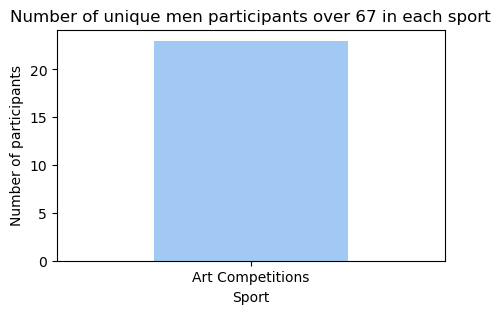

In [42]:
sport_counts = women_over_65['Sport'].value_counts()
colors = sns.color_palette('pastel')
plt.figure(figsize=(5, 3))
sport_counts.plot(kind='bar', color=colors)
plt.title('Number of unique men participants over 67 in each sport')
plt.xlabel('Sport')
plt.ylabel('Number of participants')
plt.xticks(rotation=0)
plt.show()


נשים לב שכל הנשים שהשתתפו מעל גיל הפרישה השתתפו בתחרות אמנות

In [43]:
women_over_65_with_medal = women_over_65[women_over_65['Medal'].notnull()]
sport_counts = women_over_65_with_medal['Sport'].value_counts()
print("number of female participants who won medals above the age of 65:",len(sport_counts))

number of female participants who won medals above the age of 65: 0


בניגוד לגברים אף אישה מעל גיל הפרישה לא זכתה במדליה

לסיכום, אצל הנשים הנתתונים מעבר לגיל הפרישה מרשימים הרבה פחות ופה עולה עוד שאךה, מדוע יש הרבה פחות נשים שמתחרות מעבר לגיל הפרישה מאשר גברים למרות שתוחלת החיים של נשים לאורך השנים גדולה יותר מתוחלת החיים של הגברים

In [44]:
max_age = women_over_65['Age'].max()
participants_max_age_female = women_over_65[women_over_65['Age'] == max_age]
participants_max_age_female

ID                                  Name Sex   Age  Height  Weight  \
35445  18252  Anne Marie Carl-Nielsen (Brodersen-)   F  73.0     NaN     NaN   

          Team  NOC        Games  Year  Season    City             Sport  \
35445  Denmark  DEN  1936 Summer  1936  Summer  Berlin  Art Competitions   

                                                   Event Medal      reg  
35445  Art Competitions Mixed Sculpturing, Unknown Event   NaN  Denmark

האישה המבוגרת ביותר שהתחרתה באולמפיאדהת גם היא התחרתה בשנת 1936 במקצה של תחרות האומנות

In [45]:
# age_medals_sport_male[age_medals_sport_male['Sport'] == 'Rowing']

In [46]:
summer_olympics_df = olympic_df[olympic_df['Season'] == 'Summer']
winter_olympics_df = olympic_df[olympic_df['Season'] == 'Winter']

In [178]:
summer_top_med_df = summer_olympics_df.groupby('NOC')[['Medal']].count() 
summer_top_med_df= summer_top_med_df.reset_index()
summer_top_med_df = summer_top_med_df.nlargest(10, 'Medal')
winter_top_med_df = winter_olympics_df.groupby('NOC')[['Medal']].count() 
winter_top_med_df= winter_top_med_df.reset_index()
winter_top_med_df = winter_top_med_df.nlargest(10, 'Medal')

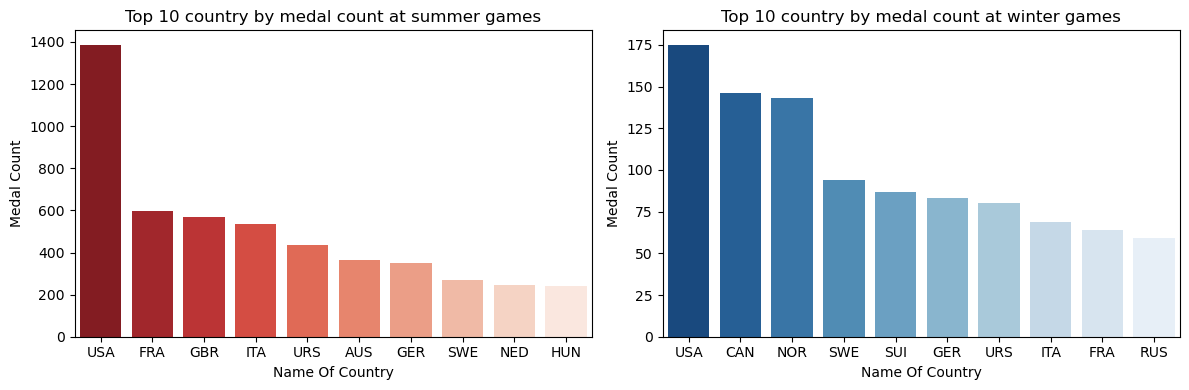

In [179]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(data=summer_top_med_df, x='NOC', y='Medal', ax=ax[0], palette='Reds_r')
ax[0].set_title('Top 10 country by medal count at summer games')
ax[0].set_xlabel('Name Of Country')
ax[0].set_ylabel('Medal Count')
sns.barplot(data=winter_top_med_df, x='NOC', y='Medal', ax=ax[1], palette='Blues_r')
ax[1].set_title('Top 10 country by medal count at winter games')
ax[1].set_xlabel('Name Of Country')
ax[1].set_ylabel('Medal Count')

plt.tight_layout()
plt.show()

In [180]:
med_df = olympic_df.groupby('reg')[['Medal']].count() 
med_df= med_df.reset_index()
med_df = med_df.nlargest(10, 'Medal')

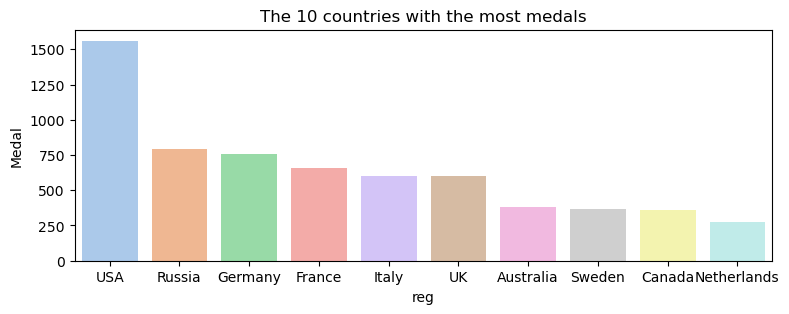

In [181]:
plt.figure(figsize=(9, 3))
sns.barplot(x='reg', y='Medal', data=med_df)
plt.title('The 10 countries with the most medals')
plt.xlabel('reg')
plt.ylabel('Medal')
plt.show()

In [182]:
events_summer_df = summer_olympics_df.groupby('Games')[['Sport']].nunique()
events_summer_df = events_summer_df.reset_index()
events_winter_df = winter_olympics_df.groupby('Games')[['Sport']].nunique()
events_winter_df = events_winter_df.reset_index()

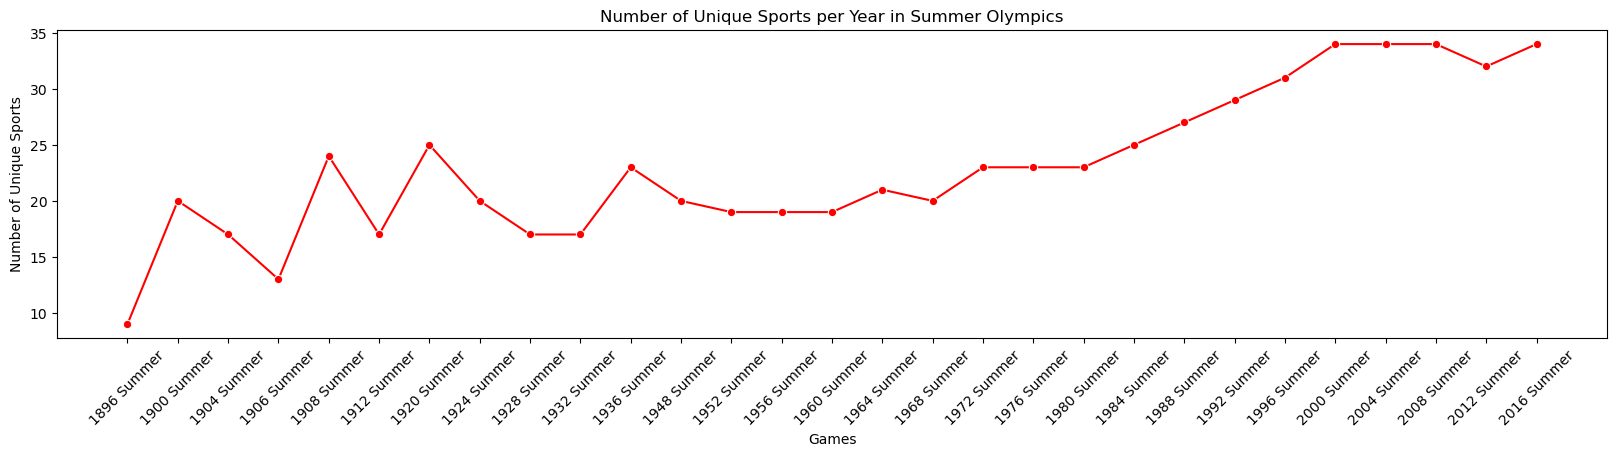

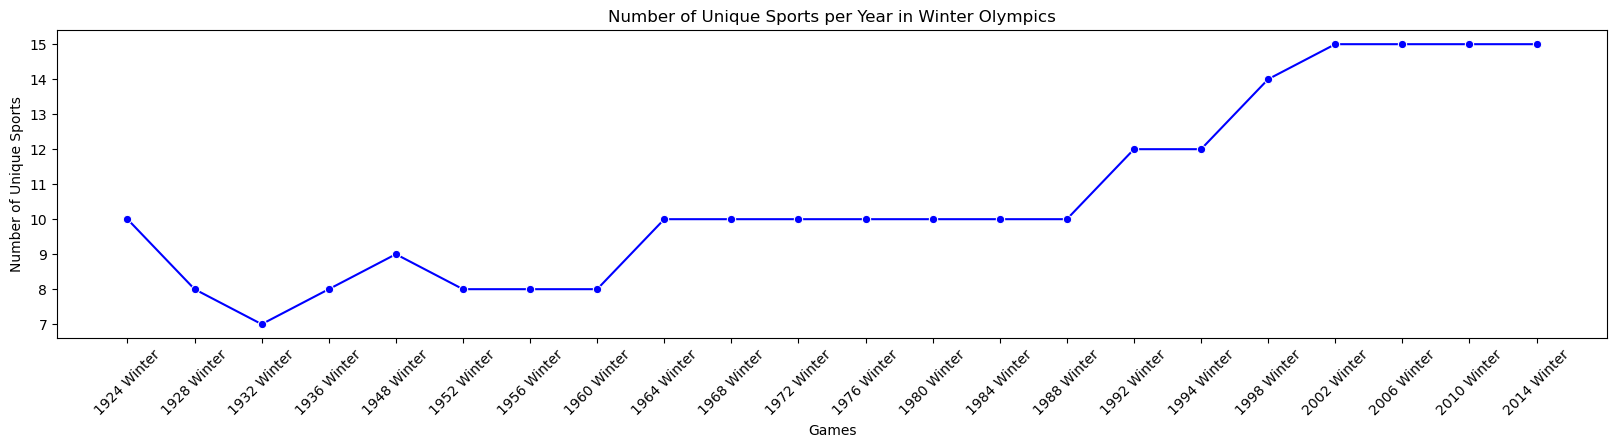

In [183]:
plt.figure(figsize=(20, 4))
sns.lineplot(data=events_summer_df, x='Games', y='Sport', marker='o', color='red')
plt.title('Number of Unique Sports per Year in Summer Olympics')
plt.xlabel('Games')
plt.ylabel('Number of Unique Sports')
plt.xticks(rotation=45)
# sns.despine()
plt.show()
plt.figure(figsize=(20, 4))
sns.lineplot(data=events_winter_df, x='Games', y='Sport', marker='o', color='blue')
plt.title('Number of Unique Sports per Year in Winter Olympics')
plt.xlabel('Games')
plt.ylabel('Number of Unique Sports')
plt.xticks(rotation=45)
# sns.despine()
plt.show()

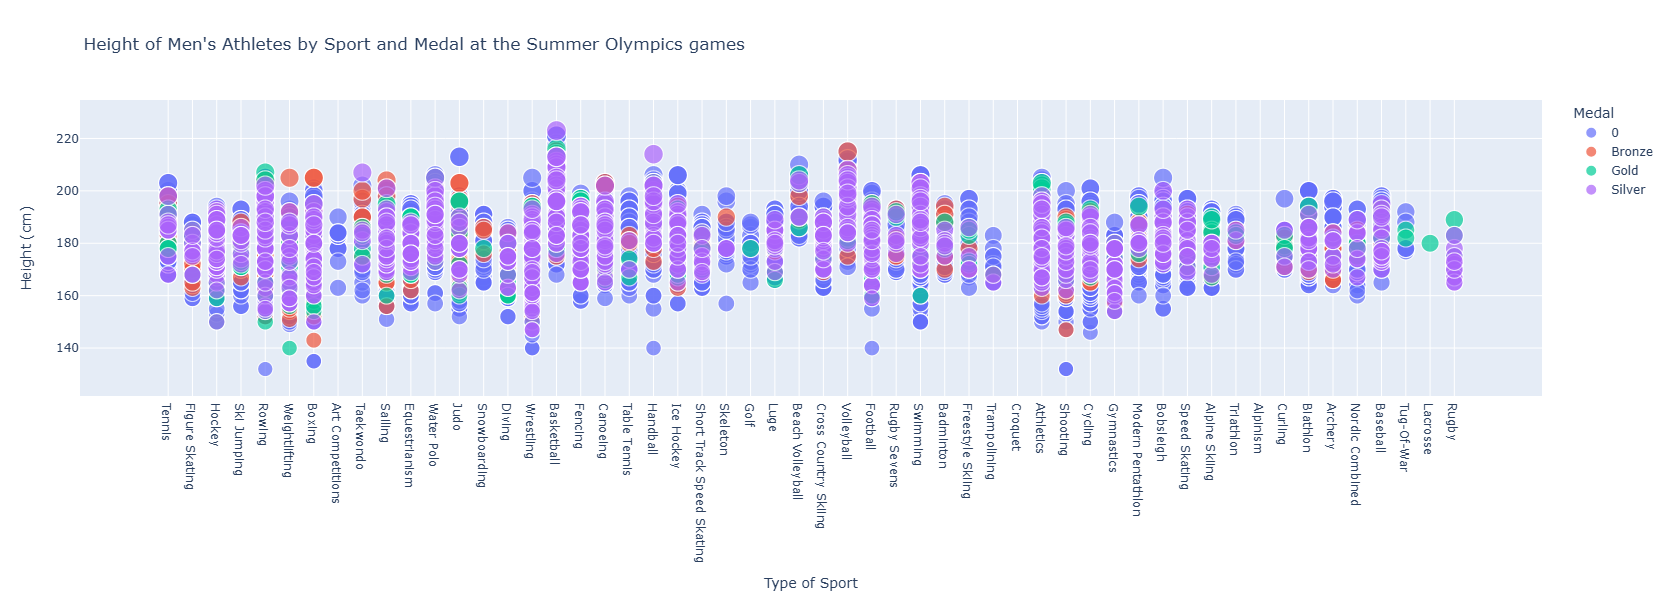

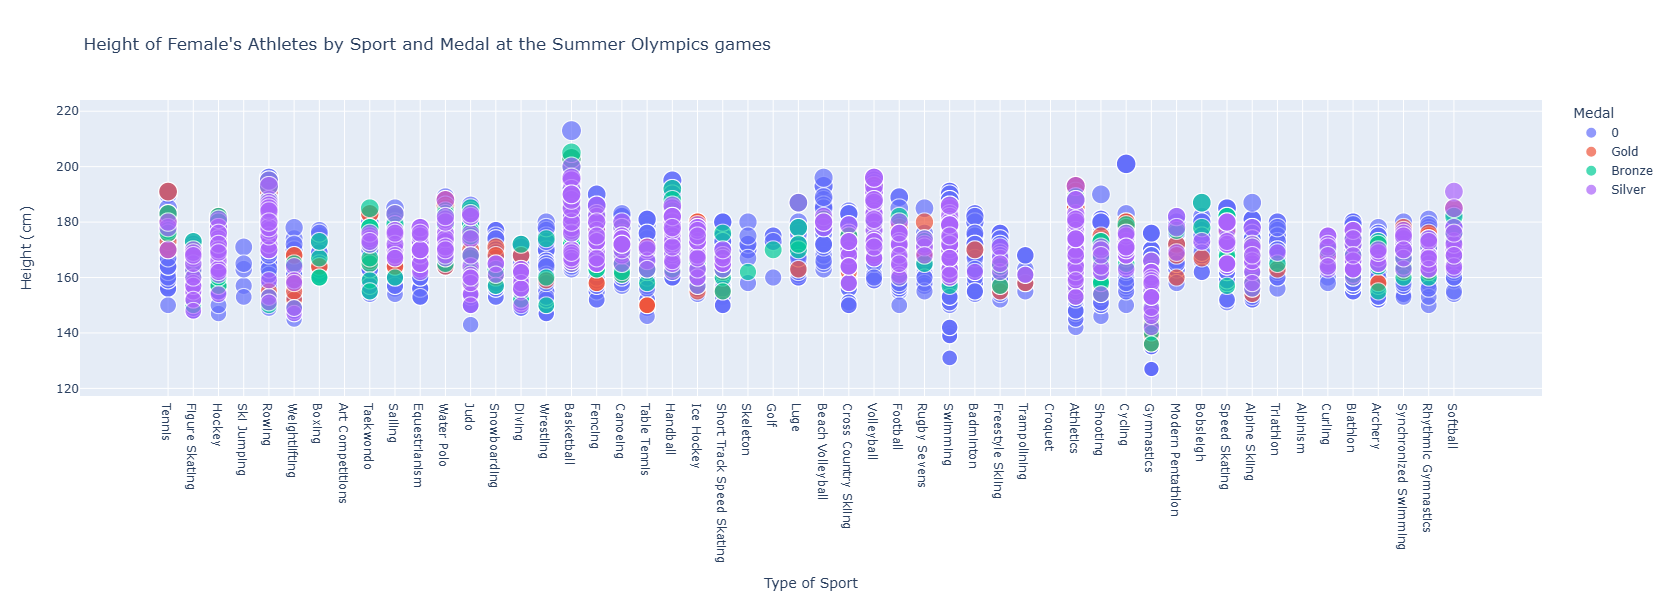

In [184]:
female_sports = female_df['Sport'].unique()
male_sports = male_df['Sport'].unique()
sport_order = list(set(female_sports) & set(male_sports))
female_df_cleaned = female_df.dropna(subset=['Height', 'Medal'])
male_df_cleaned = male_df.dropna(subset=['Height', 'Medal'])
fig1 = px.scatter(male_df_cleaned, 
                  x='Sport', 
                  y='Height', 
                  color='Medal',
                  size='Height',
                  hover_name='Sport',
                  title="Height of Men's Athletes by Sport and Medal at the Summer Olympics games",
                  category_orders={'Sport': sport_order},
                  labels={'Sport': 'Type of Sport', 'Height': 'Height (cm)', 'Medal': 'Medal'},
                  height=600)
fig2 = px.scatter(female_df_cleaned, 
                  x='Sport', 
                  y='Height', 
                  color='Medal',
                  size='Height',
                  hover_name='Sport',
                  title="Height of Female's Athletes by Sport and Medal at the Summer Olympics games",
                  category_orders={'Sport': sport_order},
                  labels={'Sport': 'Type of Sport', 'Height': 'Height (cm)', 'Medal': 'Medal'},
                  height=600)

fig1.show()
fig2.show()

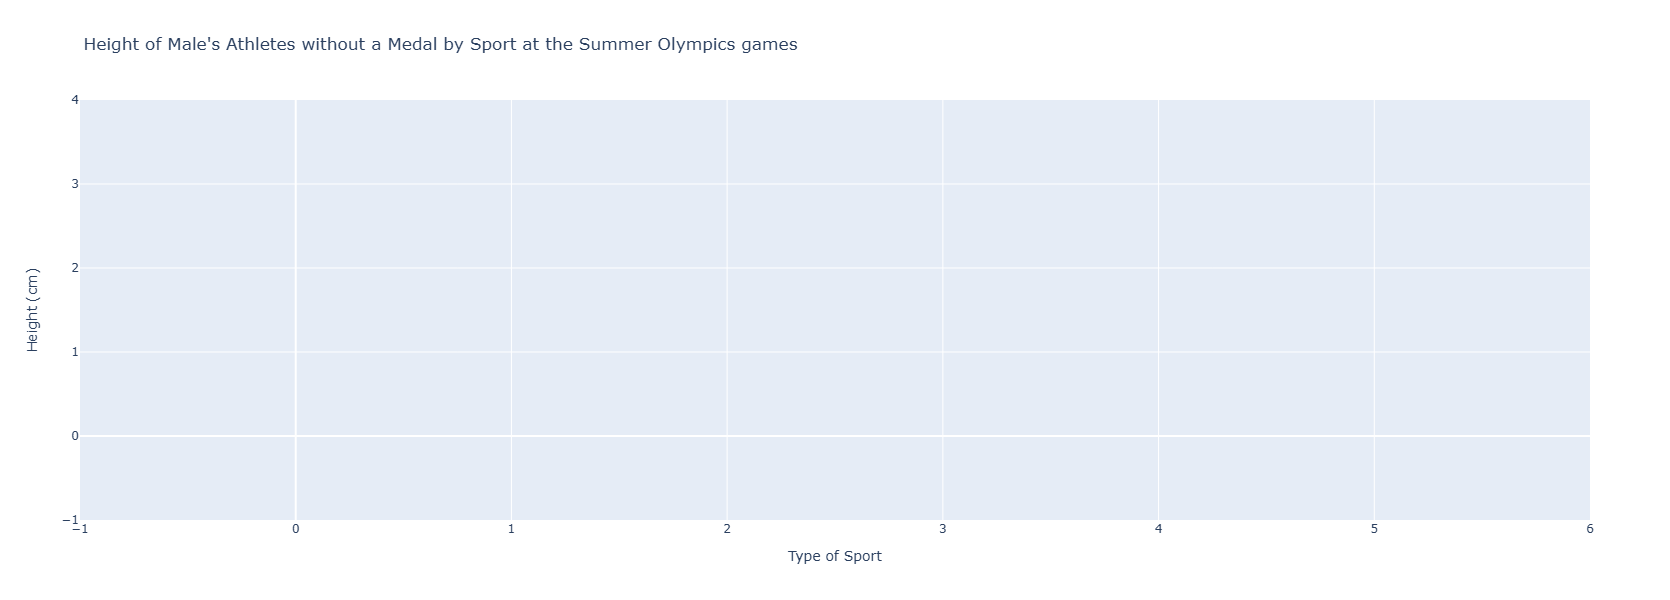

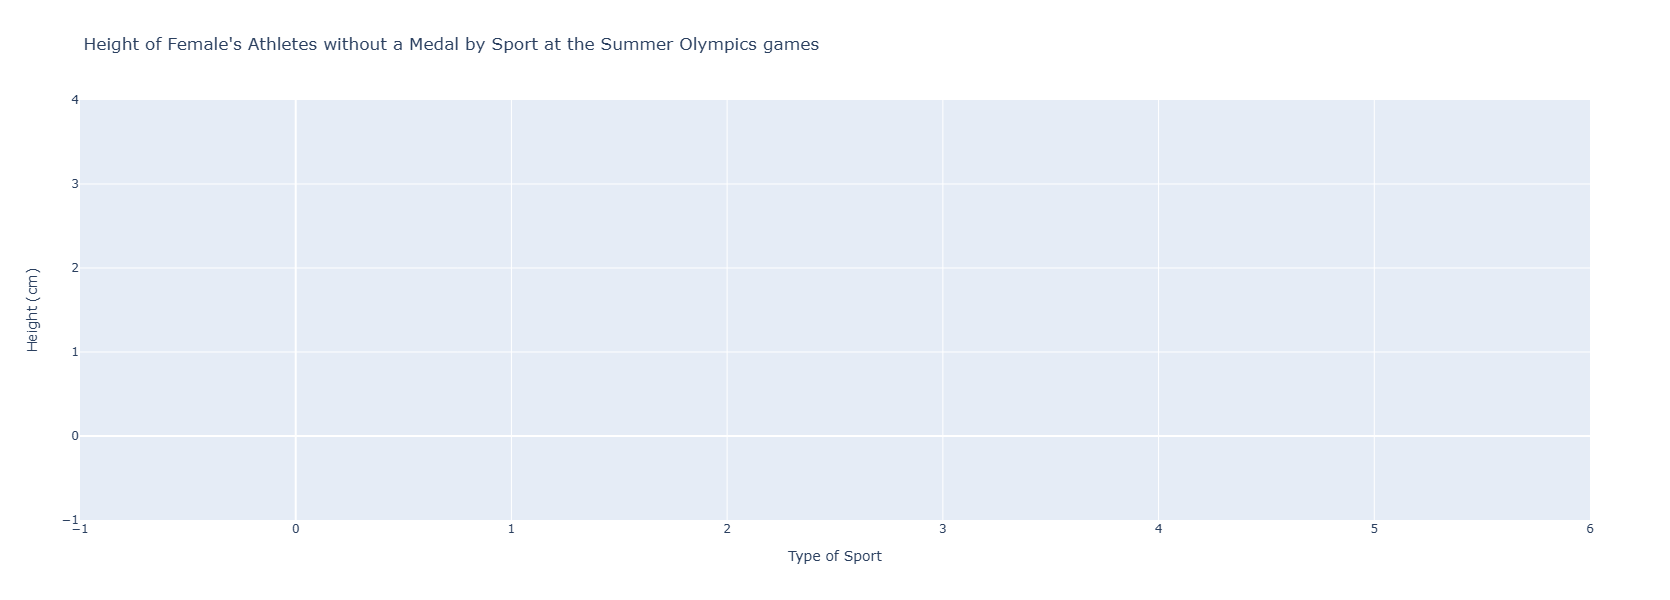

In [185]:
female_sports = female_df['Sport'].unique().tolist()
male_sports = male_df['Sport'].unique().tolist()
sport_order = list(set(female_sports) & set(male_sports))

no_medal_oly_m_df = male_df[pd.isna(male_df['Medal'])]
no_medal_oly_f_df = female_df[pd.isna(female_df['Medal'])]

fig1 = px.scatter(no_medal_oly_m_df, 
                  x='Sport', 
                  y='Height', 
                  color_discrete_sequence=['brown'], 
                  hover_name='Sport',
                  title="Height of Male's Athletes without a Medal by Sport at the Summer Olympics games",
                  labels={'Sport': 'Type of Sport', 'Height': 'Height (cm)', 'Medal': 'Medal'},
                  category_orders={"Sport": sport_order},  # סדר קטגוריות ספורט כפי שמוגדר בקוד
                  height=600)

fig2 = px.scatter(no_medal_oly_f_df, 
                  x='Sport', 
                  y='Height', 
                  color_discrete_sequence=['purple'], 
                  hover_name='Sport',
                  title="Height of Female's Athletes without a Medal by Sport at the Summer Olympics games",
                  labels={'Sport': 'Type of Sport', 'Height': 'Height (cm)', 'Medal': 'Medal'},
                  category_orders={"Sport": sport_order},  # סדר קטגוריות ספורט כפי שמוגדר בקוד
                  height=600)

fig1.show()
fig2.show()

In [186]:
top_ath_df = olympic_df.groupby('Name')[['Medal']].count() 
top_ath_df= top_ath_df.reset_index()
top_ath_df = top_ath_df.nlargest(10, 'Medal')
top_ath_df = top_ath_df.merge(olympic_df[['Name','NOC']], on='Name', how='left').drop_duplicates()
top_ath_df

Name  Medal  NOC
0       Nikolay Yefimovich Andrianov     15  URS
24               Ole Einar Bjrndalen     13  NOR
51            Birgit Fischer-Schmidt     12  GDR
55            Birgit Fischer-Schmidt     12  GER
64     Natalie Anne Coughlin (-Hall)     12  USA
76    Matthew Nicholas "Matt" Biondi     11  USA
88         Viktor Ivanovych Chukarin     11  URS
104           Vra slavsk (-Odloilov)     11  TCH
122  Aleksandr Nikolayevich Dityatin     10  URS
138                     Marit Bjrgen     10  NOR
157      Polina Hryhorivna Astakhova     10  URS

In [187]:
change_ath_df = olympic_df.groupby('Name')[['NOC']].nunique() 
change_ath_df= change_ath_df.reset_index()
change_ath_df = change_ath_df.nlargest(61, 'NOC')
change_ath_df = change_ath_df.rename(columns={'NOC': 'Number of shows'})
change_ath_df = change_ath_df.merge(olympic_df[['Name','NOC','reg','Year','Season']], on='Name', how='left').drop_duplicates()
change_ath_df

Name  Number of shows  NOC         reg  \
0                        Mamadou Diallo                4  MTN  Mauritania   
1                        Mamadou Diallo                4  GUI      Guinea   
2                        Mamadou Diallo                4  MLI        Mali   
3                        Mamadou Diallo                4  SEN     Senegal   
4            Andrey Pavlovich Bakhvalov                3  URS      Russia   
..                                  ...              ...  ...         ...   
285  Annemarie Josefina "Anna" Cox-Wood                2  AUS   Australia   
287  Annemarie Josefina "Anna" Cox-Wood                2  AUS   Australia   
288  Annemarie Josefina "Anna" Cox-Wood                2  AUS   Australia   
289     Apolinario "Polin" Belisle Gmez                2  BIZ      Belize   
290     Apolinario "Polin" Belisle Gmez                2  HON    Honduras   

     Year  Season  
0    1984  Summer  
1    1980  Summer  
2    2004  Summer  
3    1984  Summer  
4    1988  Winter  
..    ...     ...  
285  1992  Summer  
287  1996  Summer  
288  2000  Summer  
289  1988  Summer  
290  1992  Summer  

[179 rows x 6 columns]

In [188]:
israel_df = olympic_df[olympic_df['reg'] == 'Israel']
israel_df.shape

(157, 16)

In [189]:
israel_df 
medal = israel_df.groupby('Sport')[['Medal']].count()
medal = medal.reset_index()
medal

Sport  Medal
0                   Athletics      0
1                  Basketball      0
2                      Boxing      0
3                    Canoeing      0
4                     Cycling      0
5                     Fencing      0
6              Figure Skating      0
7                    Football      0
8                        Golf      0
9                  Gymnastics      0
10                       Judo      1
11        Rhythmic Gymnastics      0
12                    Sailing      0
13                   Shooting      0
14  Short Track Speed Skating      0
15                   Swimming      0
16                  Taekwondo      0
17                     Tennis      0
18                  Triathlon      0
19              Weightlifting      0
20                  Wrestling      0

In [190]:
# # הפיכת עמודת הספורט למשתנה דמי
# sport_dummy = pd.get_dummies(summer_olympics_df['Sport'])
# sport_dummy = ['Age', 'Height', 'Weight'] + list(sport_dummy.columns)
# # יצירת DataFrame עם עמודות המתאימות
# cols = ['Age', 'Height', 'Weight'] + list(sport_dummy.columns)
# data_for_corr = sport_dummy[cols]

# # חישוב טבלת קורלציה
# correlation_table = data_for_corr.corr()

# # הצגת הטבלה
# correlation_table
# הפיכת עמודת הספורט למשתנה דמי
# הפיכת עמודת הספורט למשתנה דמי
sport_dummy = pd.get_dummies(summer_olympics_df['Sport'])
sport_dummy_cols = list(sport_dummy.columns)

# יצירת DataFrame עם עמודות המתאימות
cols = ['Age', 'Height', 'Weight'] + sport_dummy_cols
data_for_corr = summer_olympics_df[cols]

correlation_matrix = sport_dummy.corr(numeric_only = False, method = 'spearman' ).round(2)
subset_correlation_matrix = correlation_matrix[cols].transpose()
subset_correlation_matrix


KeyError: "['Alpinism', 'Archery', 'Art Competitions', 'Athletics', 'Badminton', 'Baseball', 'Basketball', 'Basque Pelota', 'Beach Volleyball', 'Boxing', 'Canoeing', 'Cricket', 'Croquet', 'Cycling', 'Diving', 'Equestrianism', 'Fencing', 'Figure Skating', 'Football', 'Golf', 'Gymnastics', 'Handball', 'Hockey', 'Ice Hockey', 'Jeu De Paume', 'Judo', 'Lacrosse', 'Modern Pentathlon', 'Motorboating', 'Polo', 'Racquets', 'Rhythmic Gymnastics', 'Roque', 'Rowing', 'Rugby', 'Rugby Sevens', 'Sailing', 'Shooting', 'Softball', 'Swimming', 'Synchronized Swimming', 'Table Tennis', 'Taekwondo', 'Tennis', 'Trampolining', 'Triathlon', 'Tug-Of-War', 'Volleyball', 'Water Polo', 'Weightlifting', 'Wrestling'] not in index"

In [191]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = summer_olympics_df
data = le.fit_transform(data['Sport'])

# חישוב הקורלציה
correlation = data[['height', 'sport_encoded']].corr()

print(correlation)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
len(olympic_df['NOC'].unique())

In [ ]:
olympic_df['Medal'].unique()

In [ ]:
olympic_df.shape

In [ ]:
year_df = olympic_df.groupby('Year')
year_df

In [ ]:
tr = olympic_df[olympic_df['Year'] == 1896]
tr

In [ ]:
tr = olympic_df[olympic_df['Medal'] == 'Bronze']
len(tr)

In [ ]:
columns_list = male_df.columns.tolist()
print(columns_list)



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# פילוט גרף עבור התפלגות המשתתפים לפי מגדר וגיל
plt.figure(figsize=(10, 6))
sns.histplot(data=male_df, x='Age', hue='Sex', multiple='stack', palette='muted', bins=20)
plt.title('Distribution of Participants by Gender and Age')
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()


In [ ]:
# נסכם את הנתונים לפי מגדר וגיל
gender_age_distribution = male_df.groupby(['Sex', 'Age']).size().reset_index(name='Count')

# הדפסת הנתונים
print(gender_age_distribution)


In [ ]:
# ספירת הופעות של כל ערך בעמודה 'Age'
age_counts = male_df['Age'].value_counts()
most_common_age = age_counts.idxmax()
most_common_age_count = age_counts.max()

# ספירת הופעות של כל ערך בעמודה 'Sport'
sport_counts = male_df['Sport'].value_counts()
most_common_sport = sport_counts.idxmax()
most_common_sport_count = sport_counts.max()

# ספירת הופעות של כל ערך בעמודה 'Medal'
medal_counts = male_df[male_df['Medal'] != 0]['Medal'].value_counts()
most_common_medal = medal_counts.idxmax()
most_common_medal_count = medal_counts.max()

most_common_medal = medal_counts.idxmax()
most_common_medal_count = medal_counts.max()

# הדפסת הנתונים
print("Most common age:", most_common_age, "Count:", most_common_age_count)
print("Most common sport:", most_common_sport, "Count:", most_common_sport_count)
print("Most common medal:", most_common_medal, "Count:", most_common_medal_count)
